In [1]:
# !pip install matplotlib
# !pip install --upgrade numpy
# !conda install numpy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


file_path = "../InputData/vgchartz-6_23_2020.csv"
data2 = "../InputData/vgsales-12-4-2019.csv"
data3 = "../InputData/Video_Games.csv"


game_data_2020 = pd.read_csv(file_path)
game_data2019 = pd.read_csv(data2)   
game_data3 = pd.read_csv(data3)

In [3]:
list(game_data_2020)

['Unnamed: 0',
 'img',
 'title',
 'console',
 'genre',
 'publisher',
 'developer',
 'vg_score',
 'critic_score',
 'user_score',
 'total_shipped',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales',
 'release_date',
 'last_update']

In [4]:
clean_data_20 = game_data_2020.drop(['Unnamed: 0','img','last_update','release_date','console','publisher','developer'],axis=1)
clean_data_20

,title,genre,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Warriors,Action,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN
1,God of War,Action,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN
2,Devil May Cry,Action,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN
3,Grand Theft Auto V,Action,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12
4,Frogger,Action,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57902,World End Syndrome,Visual Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57903,XBlaze Lost: Memories,Visual Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57904,"Yoru, Tomosu",Visual Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57905,"Yoru, Tomosu",Visual Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#groupping data for individual plotting with the sum of total sales

total_sales_20 = clean_data_20.groupby(["genre"])[["total_sales"]].sum()
na_sales_20 = clean_data_20.groupby(["genre"])[["na_sales"]].sum()
jp_sales_20 = clean_data_20.groupby(["genre"])[["jp_sales"]].sum()
pal_sales_20 = clean_data_20.groupby(["genre"])[["pal_sales"]].sum()
other_sales_20 = clean_data_20.groupby(["genre"])[["other_sales"]].sum()
total_sales_20

,total_sales
genre,
Action,1178.67
Action-Adventure,148.67
Adventure,341.21
Board Game,0.33
Education,0.09
Fighting,361.45
MMO,11.86
Misc,589.74
Music,52.56


<Axes: xlabel='genre'>

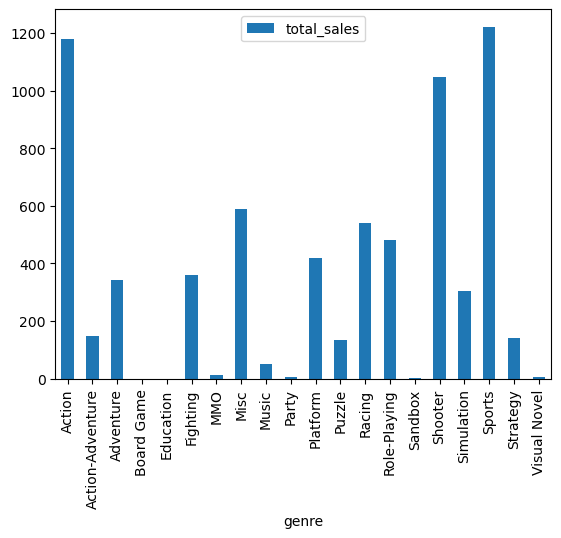

In [6]:
total_sales_20.plot.bar()

In [7]:
#grouping all data by genre for merged plitting
data1 = na_sales_20.merge(jp_sales_20, on = 'genre')
data2 = data1.merge(pal_sales_20, on = 'genre')
data3 = data2.merge(other_sales_20, on ='genre')
total_20 = data3.merge(total_sales_20, on = 'genre')
total_20

,na_sales,jp_sales,pal_sales,other_sales,total_sales
genre,,,,,
Action,612.77,87.21,358.03,119.55,1178.67
Action-Adventure,65.11,5.46,59.63,18.40,148.67
Adventure,164.42,47.70,97.07,31.61,341.21
Board Game,0.06,0.04,0.22,0.02,0.33
Education,0.08,0.00,0.00,0.01,0.09
Fighting,183.36,63.29,84.40,30.33,361.45
MMO,4.88,2.36,3.42,1.19,11.86
Misc,310.42,64.93,153.19,60.48,589.74
Music,25.98,6.58,15.08,4.93,52.56


In [8]:
#outliers plot 


<Axes: xlabel='genre'>

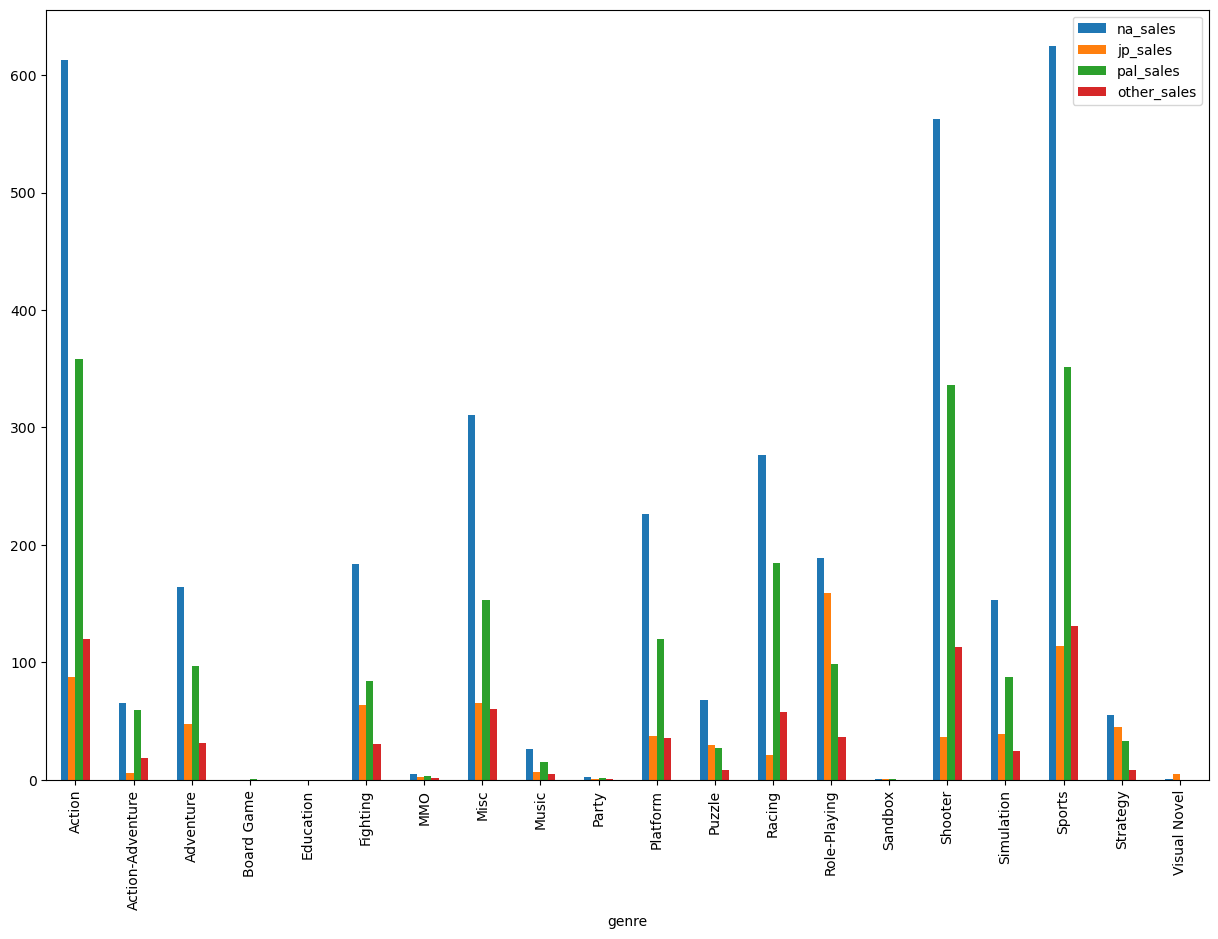

In [9]:
data3.plot.bar(figsize = (15,10))

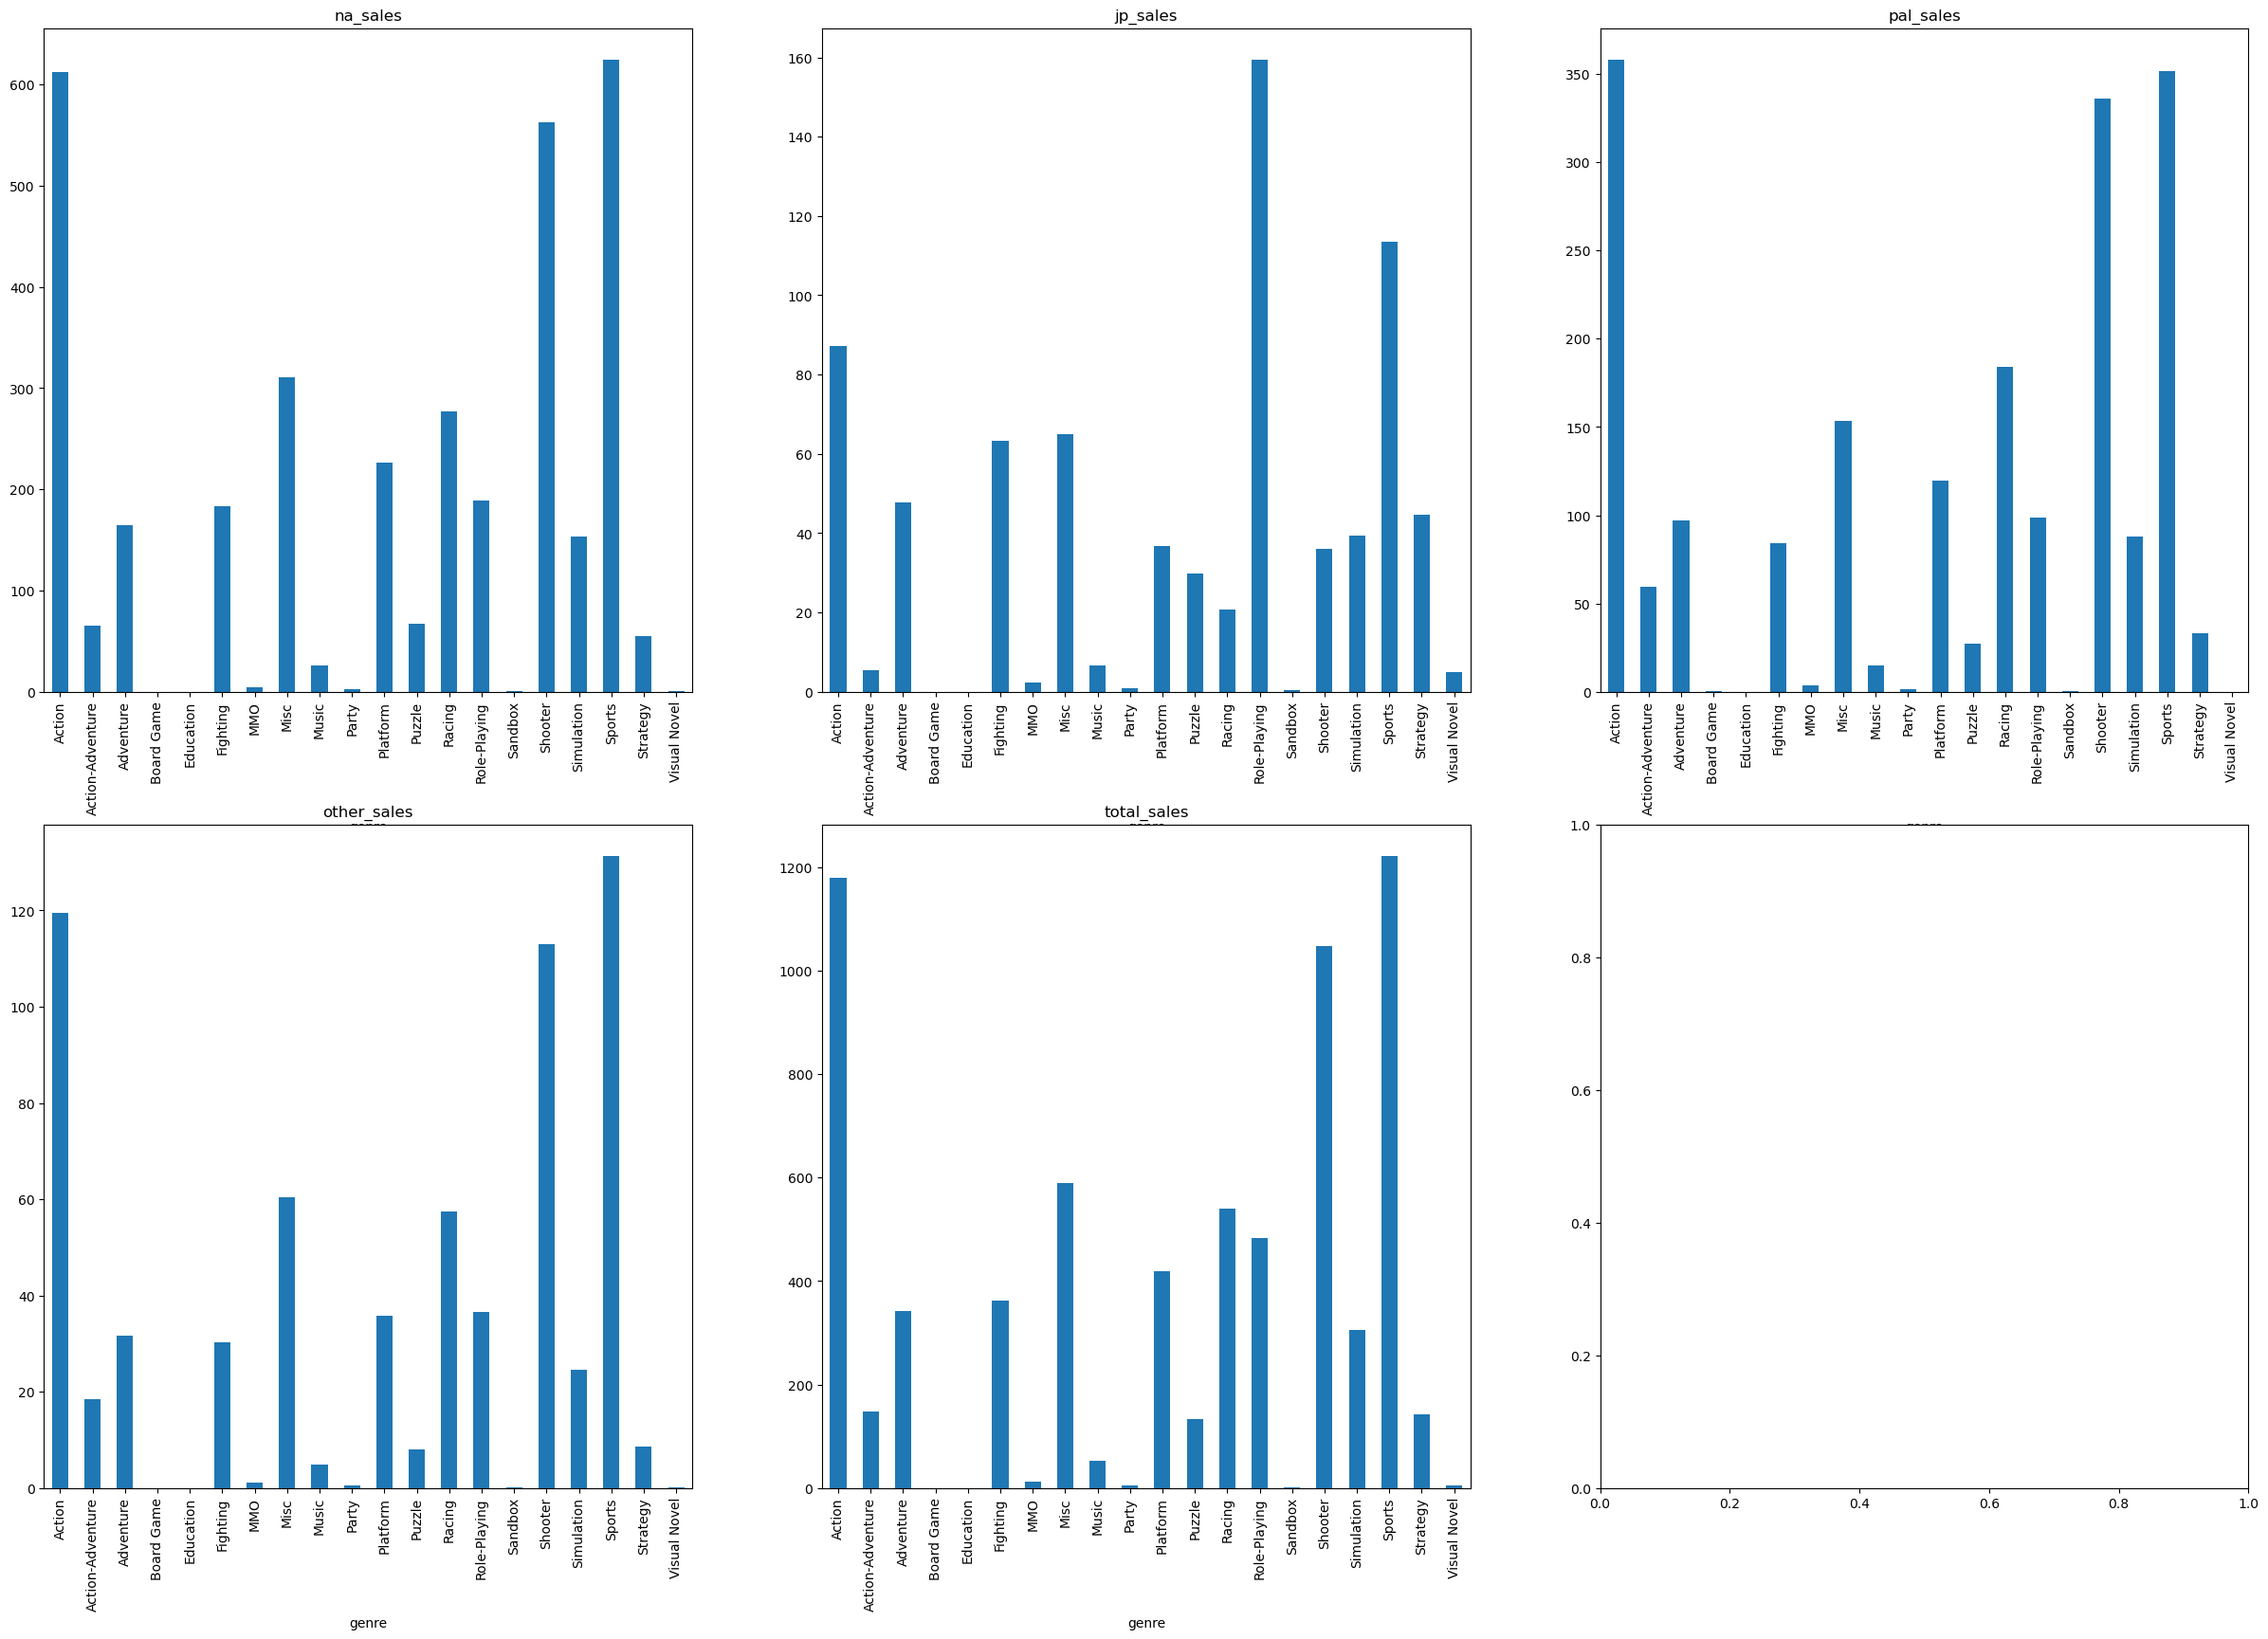

In [10]:
df = total_20

cols = df.columns
row_num = 2
col_num = 3

fig, axes = plt.subplots(row_num, col_num, squeeze=False, figsize=(30,20))

row_n = -1
for ix, col in enumerate(cols):

    col_n = ix % col_num
    if col_n == 0:
        row_n = row_n + 1
    df[col].plot(kind='bar', x=col_n, ax=axes[row_n, col_n], title=col)

plt.show()

In [11]:
#Average score by genre 

In [12]:
vg_score = clean_data_20.groupby(["genre"])[["vg_score"]].mean()
crit_score = clean_data_20.groupby(["genre"])[["critic_score"]].mean()
user_score = clean_data_20.groupby(["genre"])[["user_score"]].mean()

vg_score

,vg_score
genre,
Action,6.966082
Action-Adventure,6.407143
Adventure,7.097391
Board Game,NaN
Education,4.000000
Fighting,7.344118
MMO,NaN
Misc,7.259615
Music,7.633333


In [13]:
#Rating data merge 

In [14]:
rating1 = vg_score.merge(crit_score, on='genre')
total_rating_20 = rating1.merge(user_score, on = 'genre')
total_rating_20

,vg_score,critic_score,user_score
genre,,,
Action,6.966082,6.840234,8.192958
Action-Adventure,6.407143,7.665657,8.000000
Adventure,7.097391,7.331807,7.830556
Board Game,NaN,5.300000,NaN
Education,4.000000,7.500000,NaN
Fighting,7.344118,7.388415,8.600000
MMO,NaN,7.810000,8.633333
Misc,7.259615,6.885799,7.414286
Music,7.633333,7.973077,9.300000


<Axes: xlabel='genre'>

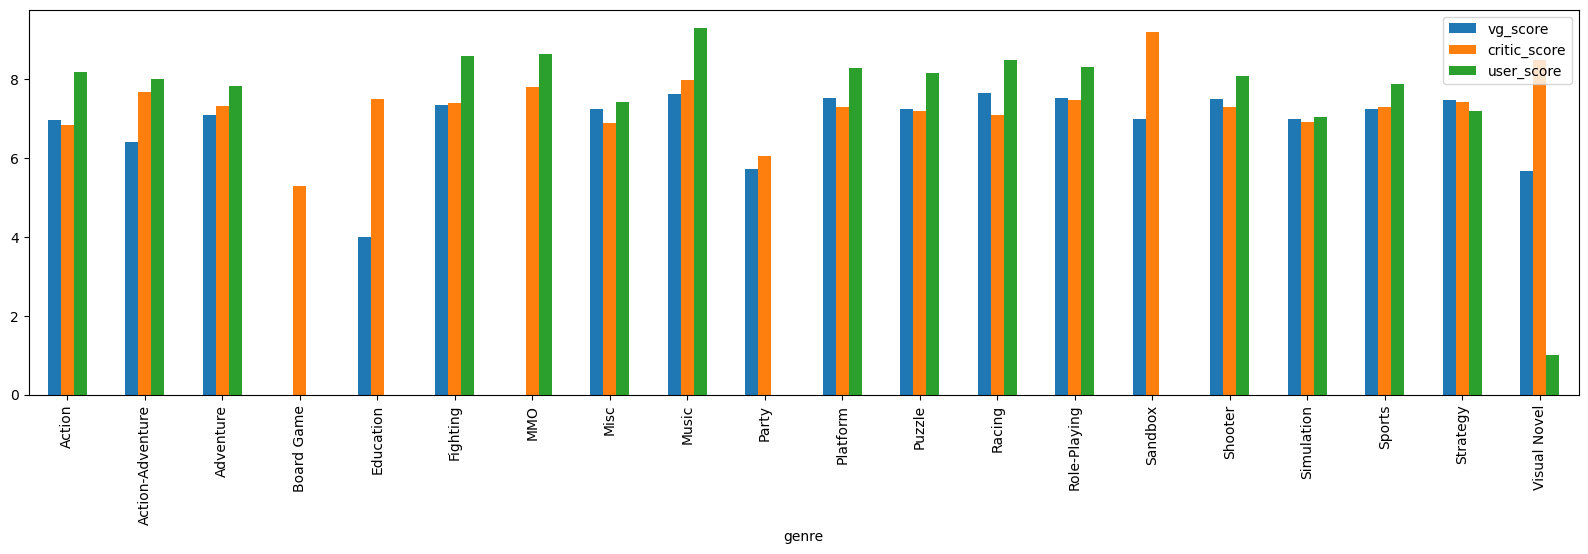

In [15]:
total_rating_20.plot.bar(figsize = (20,5))

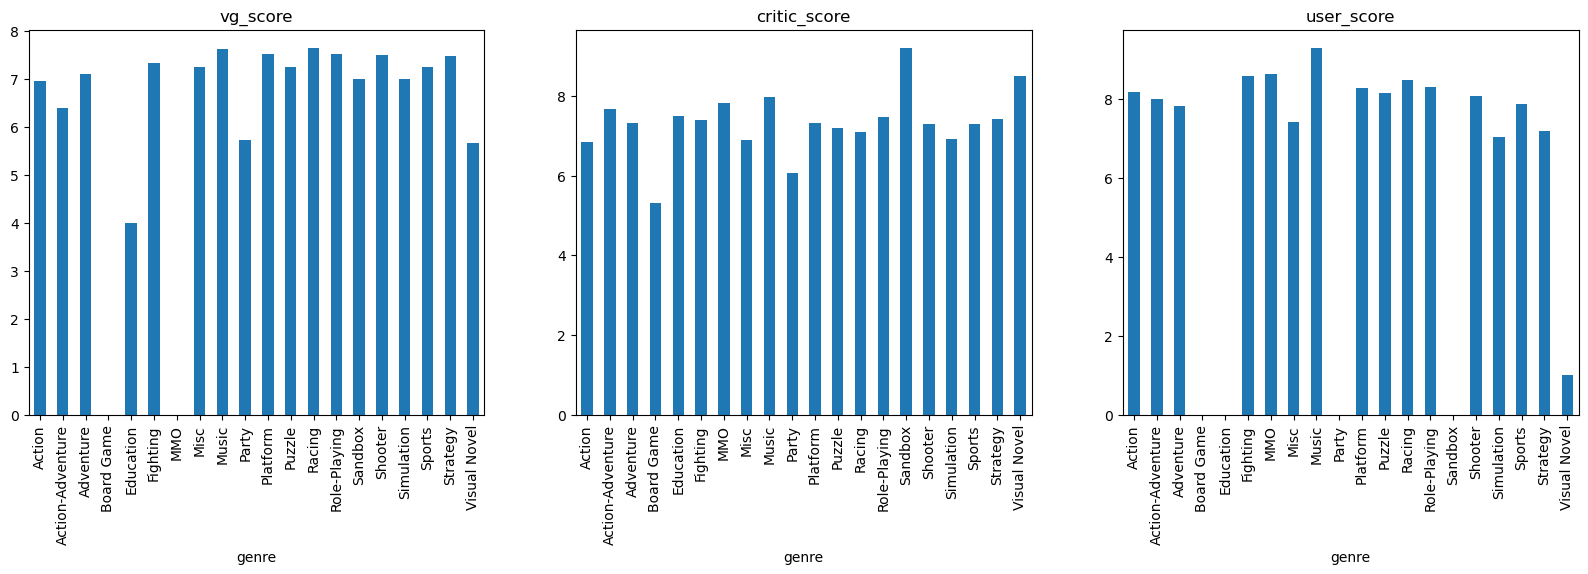

In [16]:
df = total_rating_20

cols = df.columns
row_num = 1
col_num = 3

fig, axes = plt.subplots(row_num, col_num, squeeze=False, figsize=(20,5))

row_n = -1
for ix, col in enumerate(cols):

    col_n = ix % col_num
    if col_n == 0:
        row_n = row_n + 1
    df[col].plot(kind='bar', x=col_n, ax=axes[row_n, col_n], title=col)

plt.show()

In [17]:
##2019 data

In [18]:
game_data2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [19]:
list(game_data2019)

['Rank',
 'Name',
 'basename',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer',
 'VGChartz_Score',
 'Critic_Score',
 'User_Score',
 'Total_Shipped',
 'Global_Sales',
 'NA_Sales',
 'PAL_Sales',
 'JP_Sales',
 'Other_Sales',
 'Year',
 'Last_Update',
 'url',
 'status',
 'Vgchartzscore',
 'img_url']

In [20]:
game_data2019 = game_data2019.drop(['Rank','basename','Last_Update','Publisher','Year','url','status','img_url','ESRB_Rating','Developer'],axis=1)
game_data2019

,Name,Genre,Platform,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Vgchartzscore
0,Wii Sports,Sports,Wii,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,Platform,NES,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Racing,Wii,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,8.7
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,NaN
4,Wii Sports Resort,Sports,Wii,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55790,Lost Ember,Adventure,XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
total_sales_19 = game_data2019.groupby(["Genre"])[["Global_Sales"]].sum()
na_sales_19 = game_data2019.groupby(["Genre"])[["NA_Sales"]].sum()
jp_sales_19 = game_data2019.groupby(["Genre"])[["JP_Sales"]].sum()
pal_sales_19 = game_data2019.groupby(["Genre"])[["PAL_Sales"]].sum()
other_sales_19 = game_data2019.groupby(["Genre"])[["Other_Sales"]].sum()
total_sales_19

,Global_Sales
Genre,
Action,1206.82
Action-Adventure,155.45
Adventure,346.17
Board Game,0.31
Education,0.09
Fighting,363.98
MMO,11.86
Misc,596.64
Music,52.81


In [22]:
data4 = na_sales_19.merge(jp_sales_19, on = 'Genre')
data5 = data4.merge(pal_sales_19, on = 'Genre')
data6 = data5.merge(other_sales_19, on ='Genre')
total_19 = data6.merge(total_sales_19, on = 'Genre')
total_19

,NA_Sales,JP_Sales,PAL_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,624.87,90.64,367.02,123.20,1206.82
Action-Adventure,67.84,5.60,62.51,19.45,155.45
Adventure,167.13,48.37,98.18,32.09,346.17
Board Game,0.06,0.02,0.22,0.02,0.31
Education,0.08,0.00,0.00,0.01,0.09
Fighting,184.48,63.44,85.28,30.70,363.98
MMO,4.88,2.36,3.42,1.19,11.86
Misc,311.61,68.90,154.60,60.78,596.64
Music,25.98,6.74,15.16,4.94,52.81


<Axes: xlabel='Genre'>

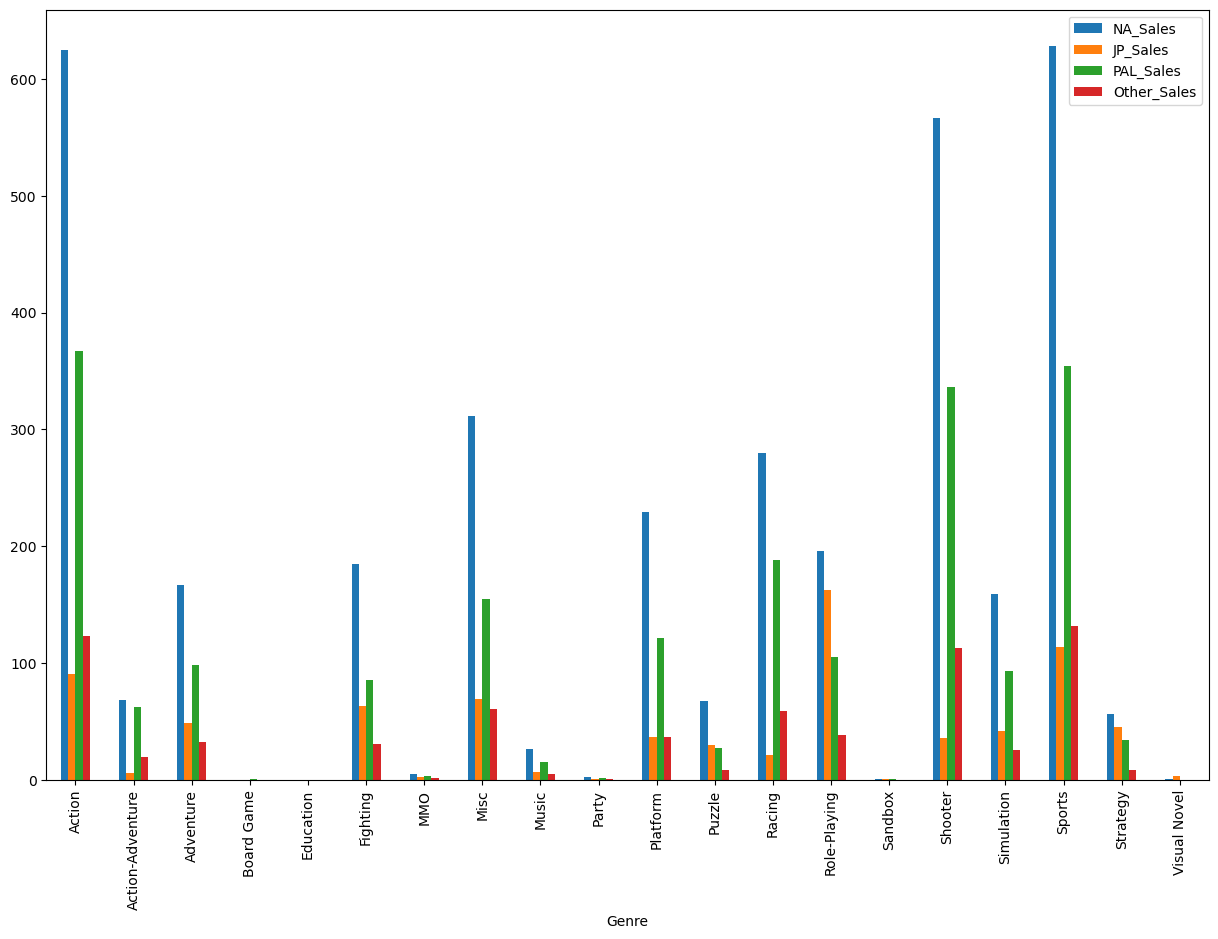

In [23]:
data6.plot.bar(figsize = (15,10))

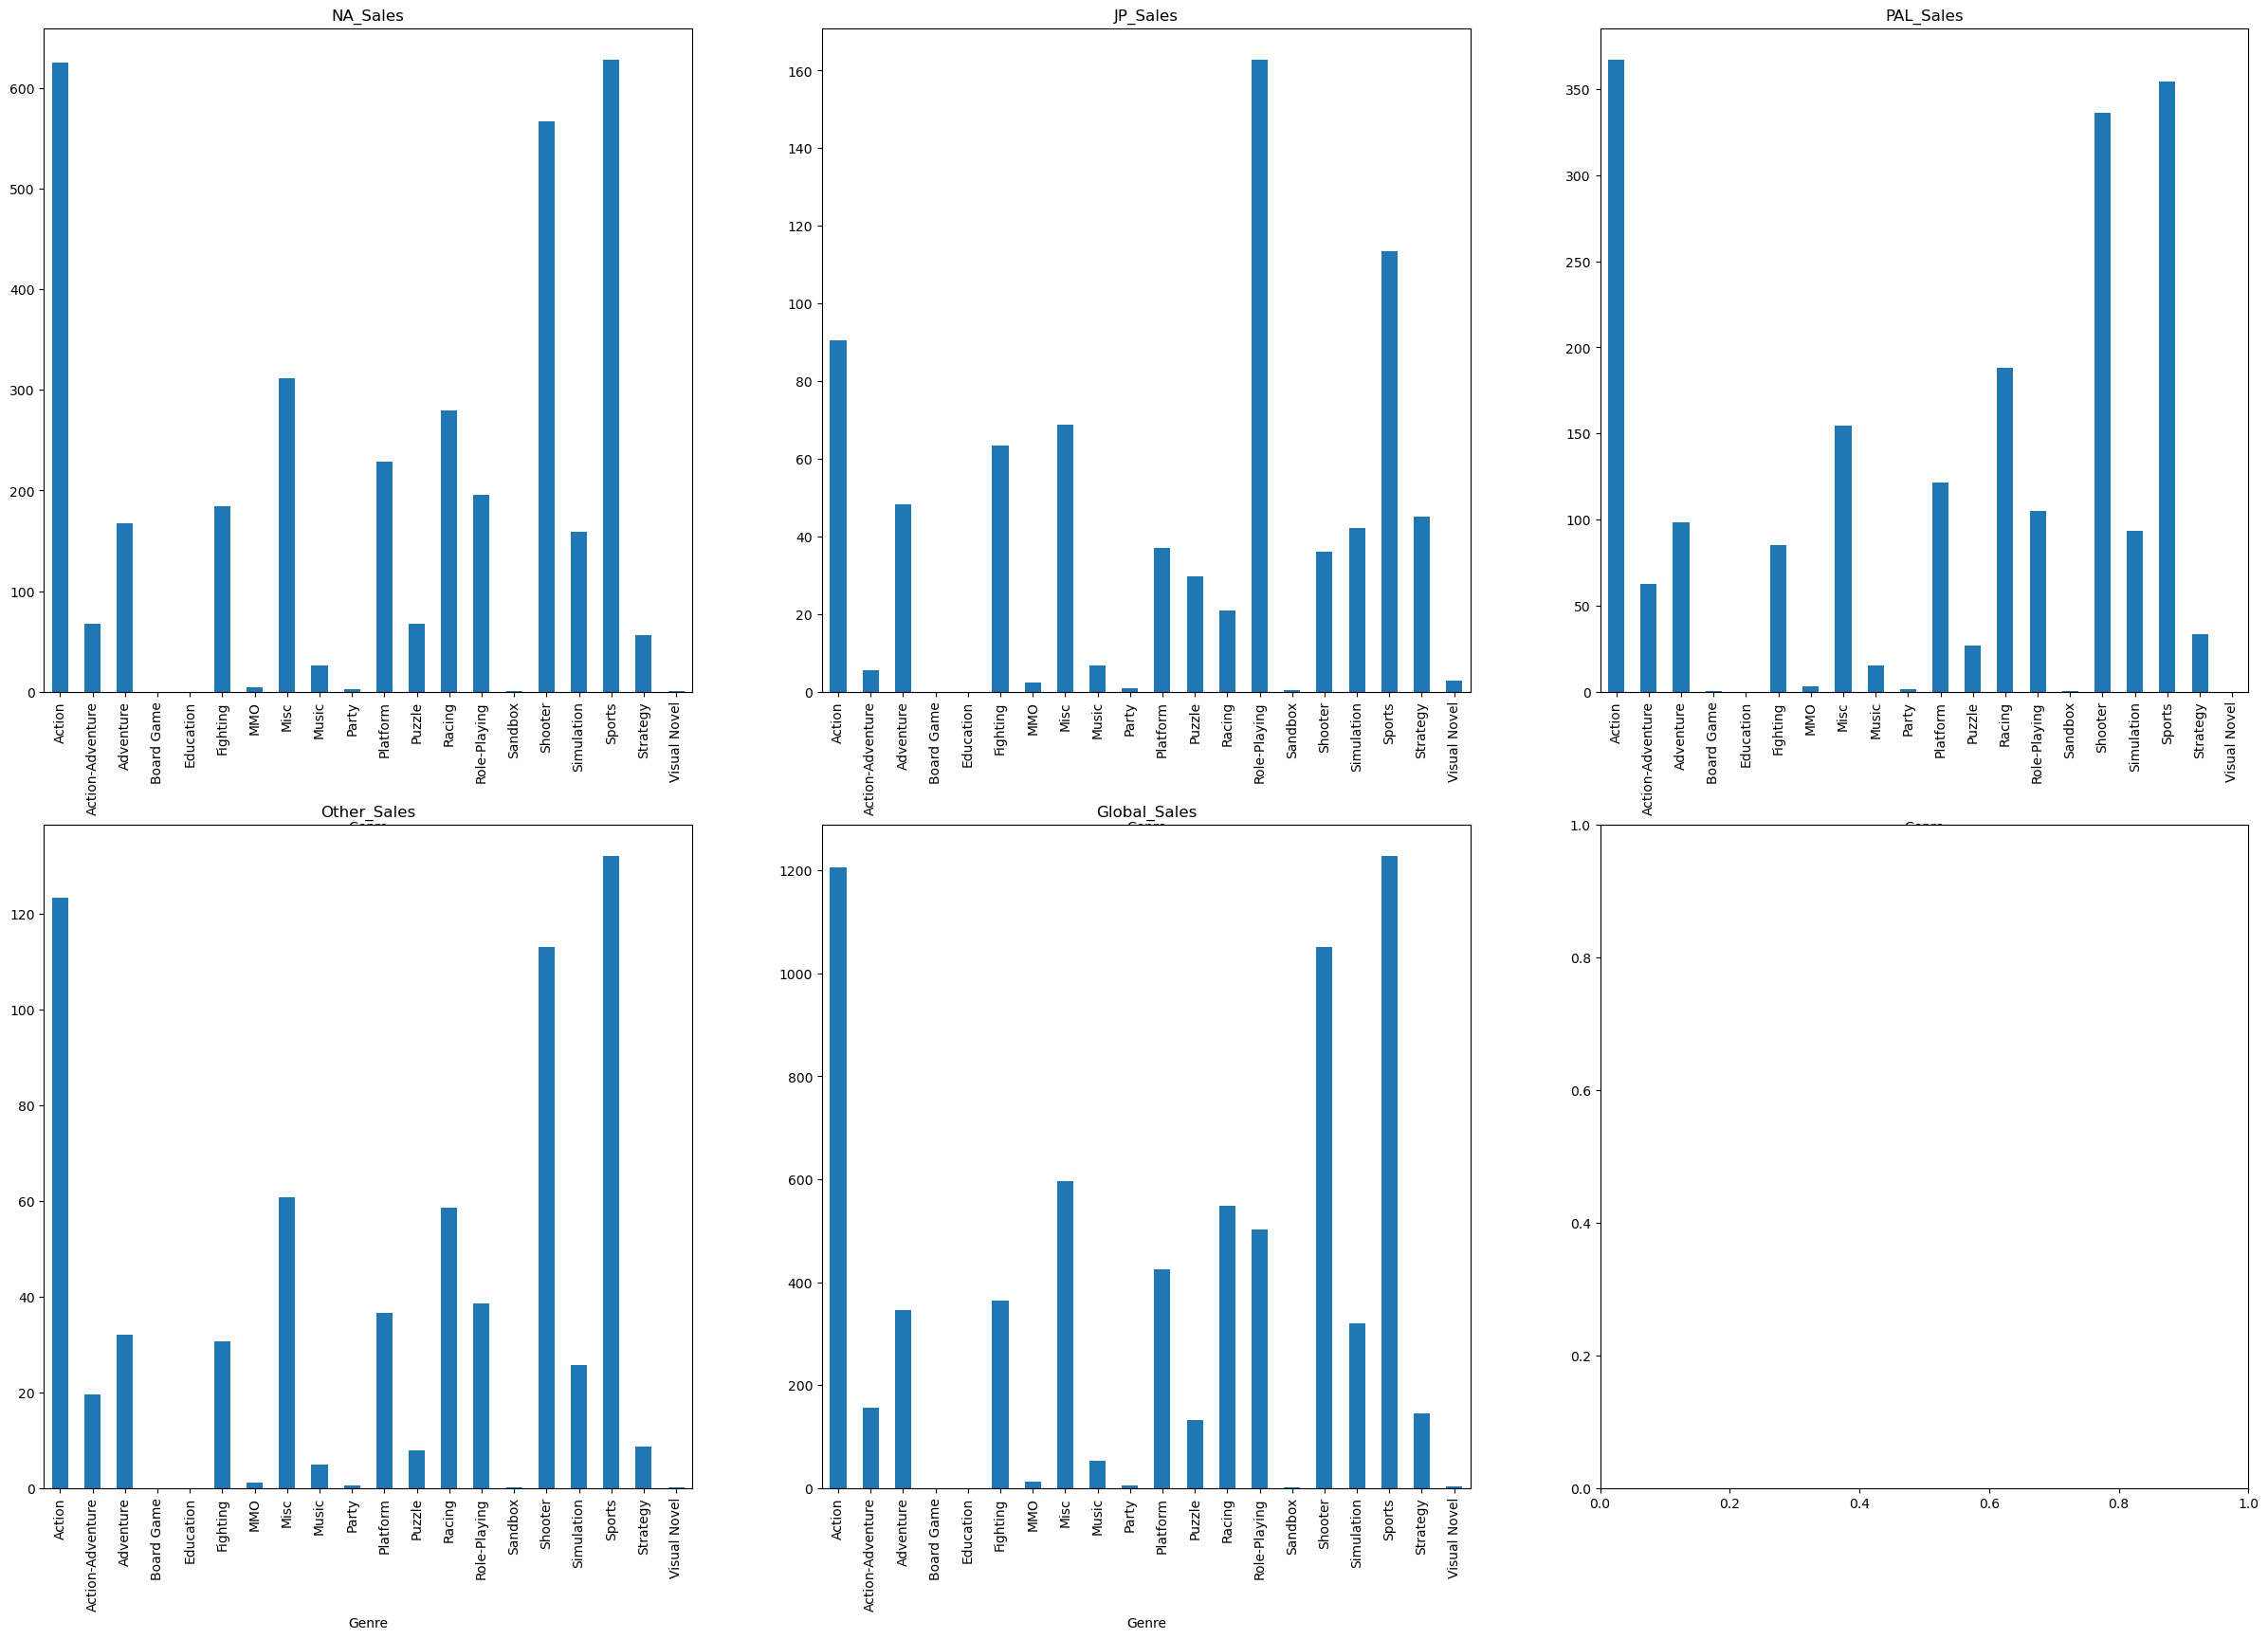

In [24]:
df = total_19

cols = df.columns
row_num = 2
col_num = 3

fig, axes = plt.subplots(row_num, col_num, squeeze=False, figsize=(30,20))

row_n = -1
for ix, col in enumerate(cols):

    col_n = ix % col_num
    if col_n == 0:
        row_n = row_n + 1
    df[col].plot(kind='bar', x=col_n, ax=axes[row_n, col_n], title=col)

plt.show()

In [25]:
#rating data 2019

In [26]:
vg_score_19 = game_data2019.groupby(["Genre"])[["Vgchartzscore"]].mean()
crit_score_19 = game_data2019.groupby(["Genre"])[["Critic_Score"]].mean()
user_score_19 = game_data2019.groupby(["Genre"])[["User_Score"]].mean()



In [27]:
rating2 = vg_score_19.merge(crit_score_19, on='Genre')
total_rating_19 = rating2.merge(user_score_19, on = 'Genre')
total_rating_19

,Vgchartzscore,Critic_Score,User_Score
Genre,,,
Action,7.080000,6.840234,8.076923
Action-Adventure,6.616667,7.693939,8.100000
Adventure,7.432258,7.329188,8.415625
Board Game,NaN,5.300000,NaN
Education,NaN,7.500000,NaN
Fighting,7.655556,7.388415,8.654545
MMO,NaN,7.810000,8.633333
Misc,7.290000,6.885799,7.414286
Music,7.950000,7.912000,9.300000


<Axes: xlabel='Genre'>

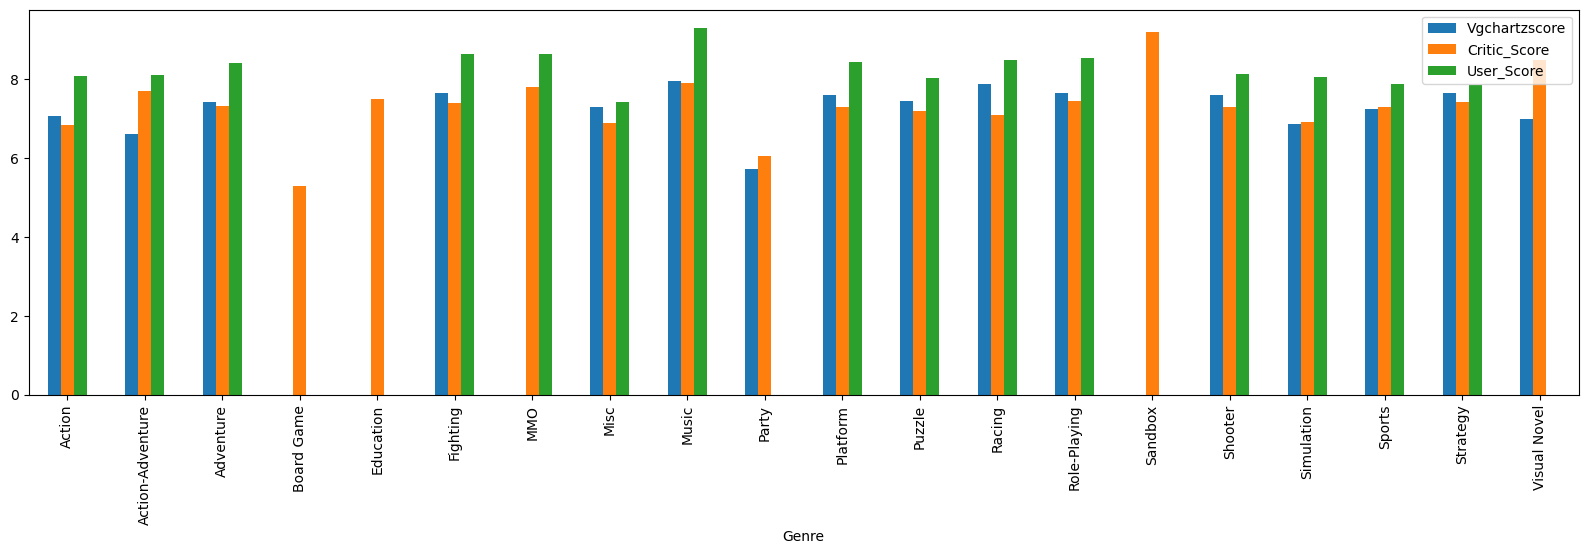

In [28]:
total_rating_19.plot.bar(figsize = (20,5))

In [29]:
#sales comparison


In [42]:
rename_sales_19 = total_sales_19.reset_index()
sales_data_19 = rename_sales_19.rename(columns={'Genre':'genre','Global_Sales':'total_sales_19'})

In [43]:
sales_data_19.set_index('genre')

,total_sales_19
genre,
Action,1206.82
Action-Adventure,155.45
Adventure,346.17
Board Game,0.31
Education,0.09
Fighting,363.98
MMO,11.86
Misc,596.64
Music,52.81


In [45]:
sales_data_20 = total_sales_20.rename(columns={'total_sales': 'total_sales_20'})
sales_data_20

,total_sales_20
genre,
Action,1178.67
Action-Adventure,148.67
Adventure,341.21
Board Game,0.33
Education,0.09
Fighting,361.45
MMO,11.86
Misc,589.74
Music,52.56


In [50]:
sales_comparison = sales_data_19.merge(sales_data_20, on = 'genre')
last_table = sales_comparison.set_index('genre')
last_table

,total_sales_19,total_sales_20
genre,,
Action,1206.82,1178.67
Action-Adventure,155.45,148.67
Adventure,346.17,341.21
Board Game,0.31,0.33
Education,0.09,0.09
Fighting,363.98,361.45
MMO,11.86,11.86
Misc,596.64,589.74
Music,52.81,52.56


<Axes: xlabel='genre'>

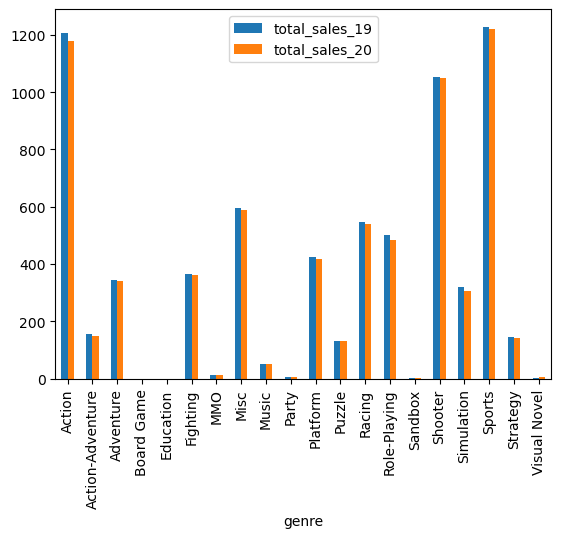

In [51]:
last_table.plot.bar()